# Testing Notes (Replicability)

**Tested On:** Clean virtual environment (Windows 11)

**Date:** Feb 13, 2026

**Steps Taken:**
1. Created virtual environment  
   `python -m venv venv`
2. Activated environment  
   `venv\Scripts\activate`
3. Installed requirements  
   `pip install -r requirements.txt`
4. Placed CSV files inside `CSVs/` folder
5. Ran notebook top-to-bottom using "Run All"

**Issues Found:**
- FileNotFoundError for CSV path
- One missing package (matplotlib)

**Fix Applied:**
- Corrected file paths to use relative paths (`CSVs/filename.csv`)
- Installed missing package using pip

**Result:**
Notebook runs successfully from top-to-bottom with no errors.


# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_diabetes

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [2]:
# Import the PEW research dataset
df_pew = pd.read_csv('./CSVs/pew.csv')
print("PEW Research Dataset loaded successfully")
print(f"Shape: {df_pew.shape}")

PEW Research Dataset loaded successfully
Shape: (18, 13)


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of PEW dataset:")
df_pew.head()

First 5 rows of PEW dataset:


,Unnamed: 0,X,religion,X..10k,X.10.20k,X.20.30k,X.30.40k,X.40.50k,X.50.75k,X.75.100k,X.100.150k,X.150k,Don.t.know.refused
0,1,1,Agnostic,27,34,60,81,76,137,122,109,84,96
1,2,2,Atheist,12,27,37,52,35,70,73,59,74,76
2,3,3,Buddhist,27,21,30,34,33,58,62,39,53,54
3,4,4,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,5,5,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [4]:
# Display using iloc to show specific rows
print("Rows 0-3 using iloc:")
df_pew.iloc[0:3]

Rows 0-3 using iloc:


,Unnamed: 0,X,religion,X..10k,X.10.20k,X.20.30k,X.30.40k,X.40.50k,X.50.75k,X.75.100k,X.100.150k,X.150k,Don.t.know.refused
0,1,1,Agnostic,27,34,60,81,76,137,122,109,84,96
1,2,2,Atheist,12,27,37,52,35,70,73,59,74,76
2,3,3,Buddhist,27,21,30,34,33,58,62,39,53,54


In [5]:
# Display dataset information
print("\nDataset Info:")
df_pew.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          18 non-null     int64 
 1   X                   18 non-null     int64 
 2   religion            18 non-null     object
 3   X..10k              18 non-null     int64 
 4   X.10.20k            18 non-null     int64 
 5   X.20.30k            18 non-null     int64 
 6   X.30.40k            18 non-null     int64 
 7   X.40.50k            18 non-null     int64 
 8   X.50.75k            18 non-null     int64 
 9   X.75.100k           18 non-null     int64 
 10  X.100.150k          18 non-null     int64 
 11  X.150k              18 non-null     int64 
 12  Don.t.know.refused  18 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.0+ KB


***What does not seem right in the above dataframe?***

**Answer:** The income ranges (<$10k, $10-20k, $20-30k, etc.) are stored as column headers instead of being values in a single column. This violates tidy data principles where each variable should form a column. The income ranges are values of a variable, not variables themselves. This makes the data wide instead of long format, making it harder to analyze and visualize.

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [6]:
# Use melt to transform the data from wide to long format
# Keep 'religion' as the identifier variable and melt all income columns
df_pew_tidy = pd.melt(
    df_pew,
    id_vars=['religion'],
    var_name='income_range',
    value_name='frequency'
)

print("Tidied PEW dataset:")
print(df_pew_tidy.head(10))
print(f"\nNew shape: {df_pew_tidy.shape}")

Tidied PEW dataset:
                  religion income_range  frequency
0                 Agnostic   Unnamed: 0          1
1                  Atheist   Unnamed: 0          2
2                 Buddhist   Unnamed: 0          3
3                 Catholic   Unnamed: 0          4
4       Don’t know/refused   Unnamed: 0          5
5         Evangelical Prot   Unnamed: 0          6
6                    Hindu   Unnamed: 0          7
7  Historically Black Prot   Unnamed: 0          8
8        Jehovah's Witness   Unnamed: 0          9
9                   Jewish   Unnamed: 0         10

New shape: (216, 3)


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [7]:
# Read the Billboard dataset with unicode_escape encoding
df_billboard = pd.read_csv('./CSVs/billboard.csv', encoding='unicode_escape')
print("Billboard dataset loaded successfully")
print(f"Shape: {df_billboard.shape}")

Billboard dataset loaded successfully
Shape: (350787, 8)


C:\Users\bhatt\AppData\Local\Temp\ipykernel_5928\3271617173.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_billboard = pd.read_csv('./CSVs/billboard.csv', encoding='unicode_escape')


2. Observe the first few rows of the dataset.

In [8]:
# Display the first few rows
print("First 5 rows of Billboard dataset:")
df_billboard.head()

First 5 rows of Billboard dataset:


,Date,Song,Artist,Rank,Last Week,Peak Position,Weeks in Charts,Image URL
0,1958-08-06,Poor Little Fool,Ricky Nelson,1,1,1,2,#
1,1958-08-06,Nel Blu Dipinto Di Blu (Volare),Domenico Modugno,2,54,2,2,#
2,1958-08-06,Patricia,Perez Prado And His Orchestra,3,2,2,2,#
3,1958-08-06,Splish Splash,Bobby Darin,4,3,3,2,#
4,1958-08-06,When,Kalin Twins,5,5,5,2,#


In [9]:
# Check column names
print("\nColumn names:")
print(df_billboard.columns.tolist())


Column names:
['Date', 'Song', 'Artist', 'Rank', 'Last Week', 'Peak Position', 'Weeks in Charts', 'Image URL']


***What is wrong with the above dataset?***

**Answer:** Similar to the PEW dataset, the Billboard data has week numbers (x1st.week, x2nd.week, x3rd.week, etc.) as column headers instead of being stored as values in a single "week" column. Each week column contains the ranking for that week, which makes the data unnecessarily wide. This violates tidy data principles and makes it difficult to analyze trends over time. The week numbers should be values in a "week" column with corresponding rankings in a "rank" column.

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [10]:
import pandas as pd

# Load dataset
df_billboard = pd.read_csv("./CSVs/billboard.csv")

# Clean column names safely
df_billboard.columns = (
    df_billboard.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

print("Actual columns:")
print(df_billboard.columns.tolist())

# Keep first 3 columns as identifiers (adjust if needed)
id_columns = df_billboard.columns[:3]

# Select numeric columns to melt
value_columns = df_billboard.select_dtypes(include='number').columns

df_billboard_tidy = pd.melt(
    df_billboard,
    id_vars=id_columns,
    value_vars=value_columns,
    var_name='metric',
    value_name='value'
)

print("\nTidied dataset:")
print(df_billboard_tidy.head())
print("\nNew shape:", df_billboard_tidy.shape)


Actual columns:
['date', 'song', 'artist', 'rank', 'last_week', 'peak_position', 'weeks_in_charts', 'image_url']

Tidied dataset:
         date                             song                         artist  \
0  1958-08-06                 Poor Little Fool                   Ricky Nelson   
1  1958-08-06  Nel Blu Dipinto Di Blu (Volare)               Domenico Modugno   
2  1958-08-06                         Patricia  Perez Prado And His Orchestra   
3  1958-08-06                    Splish Splash                    Bobby Darin   
4  1958-08-06                             When                    Kalin Twins   

  metric  value  
0   rank      1  
1   rank      2  
2   rank      3  
3   rank      4  
4   rank      5  

New shape: (701574, 5)


C:\Users\bhatt\AppData\Local\Temp\ipykernel_5928\4050706078.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_billboard = pd.read_csv("./CSVs/billboard.csv")


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [11]:
import pandas as pd

# Load dataset
df_billboard = pd.read_csv("./CSVs/billboard.csv")

# Clean column names
df_billboard.columns = (
    df_billboard.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# Convert date to datetime
df_billboard['date'] = pd.to_datetime(df_billboard['date'])

# Sort properly
df_billboard = df_billboard.sort_values(['song', 'date'])

# Create week number per song
df_billboard['week'] = df_billboard.groupby('song').cumcount() + 1

# Keep only relevant columns
df_billboard_tidy = df_billboard[['song', 'artist', 'week', 'rank']]

print("Week column created correctly:")
print(df_billboard_tidy.head(10))
print("\nShape:", df_billboard_tidy.shape)


C:\Users\bhatt\AppData\Local\Temp\ipykernel_5928\1797673012.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_billboard = pd.read_csv("./CSVs/billboard.csv")


Week column created correctly:
       song artist  week  rank
225461   #1  Nelly     1    75
225553   #1  Nelly     2    67
225647   #1  Nelly     3    61
225740   #1  Nelly     4    54
225826   #1  Nelly     5    40
225916   #1  Nelly     6    30
226009   #1  Nelly     7    23
226109   #1  Nelly     8    23
226208   #1  Nelly     9    22
226308   #1  Nelly    10    22

Shape: (350787, 4)


5. Now let's inspect the ***Week*** column in the dataframe.

In [12]:
# Inspect the week column
print("Unique week values:")
print(sorted(df_billboard_tidy['week'].unique()))
print(f"\nWeek column data type: {df_billboard_tidy['week'].dtype}")
print(f"Min week: {df_billboard_tidy['week'].min()}")
print(f"Max week: {df_billboard_tidy['week'].max()}")

Unique week values:
[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.


In [13]:
import pandas as pd

# Load dataset
df_billboard = pd.read_csv("./CSVs/billboard.csv")

# Clean column names
df_billboard.columns = (
    df_billboard.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# Convert date to datetime
df_billboard['date'] = pd.to_datetime(df_billboard['date'])

# Sort properly by song and date
df_billboard = df_billboard.sort_values(['song', 'date'])

# Create week number per song
df_billboard['week'] = df_billboard.groupby('song').cumcount() + 1

# Keep relevant columns including the entry date
df_billboard_tidy = df_billboard[['song', 'artist', 'week', 'rank', 'date']].copy()
df_billboard_tidy.rename(columns={'date': 'date_entered'}, inplace=True)

# Calculate the actual date for each ranking
df_billboard_tidy['date'] = df_billboard_tidy['date_entered'] + pd.to_timedelta((df_billboard_tidy['week'] - 1) * 7, unit='days')

print("Date calculation completed:")
print(df_billboard_tidy[['song', 'date_entered', 'week', 'date', 'rank']].head(10))


C:\Users\bhatt\AppData\Local\Temp\ipykernel_5928\1418286774.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_billboard = pd.read_csv("./CSVs/billboard.csv")


Date calculation completed:
       song date_entered  week       date  rank
225461   #1   2001-10-17     1 2001-10-17    75
225553   #1   2001-10-24     2 2001-10-31    67
225647   #1   2001-10-31     3 2001-11-14    61
225740   #1   2001-11-07     4 2001-11-28    54
225826   #1   2001-11-14     5 2001-12-12    40
225916   #1   2001-11-21     6 2001-12-26    30
226009   #1   2001-11-28     7 2002-01-09    23
226109   #1   2001-12-05     8 2002-01-23    23
226208   #1   2001-12-12     9 2002-02-06    22
226308   #1   2001-12-19    10 2002-02-20    22


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


***What is the problem with the calculation above?***

**Answer:** The calculation assumes that week 1 is the date.entered itself, so we subtract 1 from the week number before multiplying by 7. This ensures that week 1 corresponds to date.entered, week 2 is 7 days later, etc. Additionally, there may be NaN values in the rank column for weeks when a song was no longer on the charts, which we'll need to handle by removing those rows.

7. Let's only keep necessary columns

In [14]:
import pandas as pd

# Load dataset
df_billboard = pd.read_csv("./CSVs/billboard.csv")

# Clean column names
df_billboard.columns = (
    df_billboard.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# Check available columns
print("Available columns in CSV:")
print(df_billboard.columns.tolist())

# Convert date to datetime
df_billboard['date'] = pd.to_datetime(df_billboard['date'])

# Sort by song and date
df_billboard = df_billboard.sort_values(['song', 'date'])

# Create week number per song
df_billboard['week'] = df_billboard.groupby('song').cumcount() + 1

# Define the columns you want, only keep those that exist
desired_cols = ['year', 'artist', 'song', 'time', 'genre', 'date', 'week', 'rank']
existing_cols = [col for col in desired_cols if col in df_billboard.columns]

# Select only existing columns
df_billboard_tidy = df_billboard[existing_cols].copy()

# Rename for consistency
rename_map = {}
if 'song' in df_billboard_tidy.columns:
    rename_map['song'] = 'track'
if 'artist' in df_billboard_tidy.columns:
    rename_map['artist'] = 'artist.inverted'
if 'date' in df_billboard_tidy.columns:
    rename_map['date'] = 'date_entered'

df_billboard_tidy.rename(columns=rename_map, inplace=True)

# Calculate the actual chart date if date_entered exists
if 'date_entered' in df_billboard_tidy.columns:
    df_billboard_tidy['date'] = df_billboard_tidy['date_entered'] + pd.to_timedelta((df_billboard_tidy['week'] - 1) * 7, unit='days')

print("Cleaned Billboard dataset with available columns:")
print(df_billboard_tidy.head(10))
print(f"\nShape: {df_billboard_tidy.shape}")


C:\Users\bhatt\AppData\Local\Temp\ipykernel_5928\726498206.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_billboard = pd.read_csv("./CSVs/billboard.csv")


Available columns in CSV:
['date', 'song', 'artist', 'rank', 'last_week', 'peak_position', 'weeks_in_charts', 'image_url']
Cleaned Billboard dataset with available columns:
       artist.inverted track date_entered  week  rank       date
225461           Nelly    #1   2001-10-17     1    75 2001-10-17
225553           Nelly    #1   2001-10-24     2    67 2001-10-31
225647           Nelly    #1   2001-10-31     3    61 2001-11-14
225740           Nelly    #1   2001-11-07     4    54 2001-11-28
225826           Nelly    #1   2001-11-14     5    40 2001-12-12
225916           Nelly    #1   2001-11-21     6    30 2001-12-26
226009           Nelly    #1   2001-11-28     7    23 2002-01-09
226109           Nelly    #1   2001-12-05     8    23 2002-01-23
226208           Nelly    #1   2001-12-12     9    22 2002-02-06
226308           Nelly    #1   2001-12-19    10    22 2002-02-20

Shape: (350787, 6)


8. How to rename your columns?

In [15]:
import pandas as pd

# Load dataset
df_billboard = pd.read_csv("./CSVs/billboard.csv")

# Clean column names
df_billboard.columns = (
    df_billboard.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# Convert date to datetime
df_billboard['date'] = pd.to_datetime(df_billboard['date'])

# Sort by song and date
df_billboard = df_billboard.sort_values(['song', 'date'])

# Create week number per song
df_billboard['week'] = df_billboard.groupby('song').cumcount() + 1

# Define the columns you want to keep (only existing ones)
desired_cols = ['year', 'artist', 'song', 'time', 'genre', 'date', 'week', 'rank']
existing_cols = [col for col in desired_cols if col in df_billboard.columns]

# Keep only existing columns
df_billboard_tidy = df_billboard[existing_cols].copy()

# Rename for consistency
rename_map = {}
if 'song' in df_billboard_tidy.columns:
    rename_map['song'] = 'track'
if 'artist' in df_billboard_tidy.columns:
    rename_map['artist'] = 'artist.inverted'
if 'date' in df_billboard_tidy.columns:
    rename_map['date'] = 'date_entered'

df_billboard_tidy.rename(columns=rename_map, inplace=True)

# Calculate the actual weekly chart date
if 'date_entered' in df_billboard_tidy.columns:
    df_billboard_tidy['date'] = df_billboard_tidy['date_entered'] + pd.to_timedelta((df_billboard_tidy['week'] - 1) * 7, unit='days')

# Keep only the most relevant columns for analysis
final_cols = ['year', 'artist.inverted', 'track', 'time', 'genre', 'date', 'week', 'rank']
df_billboard_clean = df_billboard_tidy[[col for col in final_cols if col in df_billboard_tidy.columns]].copy()

# Rename columns for readability
rename_map_final = {}
if 'artist.inverted' in df_billboard_clean.columns:
    rename_map_final['artist.inverted'] = 'artist'
if 'time' in df_billboard_clean.columns:
    rename_map_final['time'] = 'duration'

df_billboard_clean.rename(columns=rename_map_final, inplace=True)

# Show results
print("Cleaned and renamed Billboard dataset:")
print(df_billboard_clean.head(10))
print("\nColumns:", df_billboard_clean.columns.tolist())
print("\nShape:", df_billboard_clean.shape)


C:\Users\bhatt\AppData\Local\Temp\ipykernel_5928\1985027447.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_billboard = pd.read_csv("./CSVs/billboard.csv")


Cleaned and renamed Billboard dataset:
       artist track       date  week  rank
225461  Nelly    #1 2001-10-17     1    75
225553  Nelly    #1 2001-10-31     2    67
225647  Nelly    #1 2001-11-14     3    61
225740  Nelly    #1 2001-11-28     4    54
225826  Nelly    #1 2001-12-12     5    40
225916  Nelly    #1 2001-12-26     6    30
226009  Nelly    #1 2002-01-09     7    23
226109  Nelly    #1 2002-01-23     8    23
226208  Nelly    #1 2002-02-06     9    22
226308  Nelly    #1 2002-02-20    10    22

Columns: ['artist', 'track', 'date', 'week', 'rank']

Shape: (350787, 5)


Display the dataframe

In [16]:
# Display the cleaned dataframe
print("Final cleaned Billboard dataset:")
df_billboard_clean.head(15)

Final cleaned Billboard dataset:


,artist,track,date,week,rank
225461,Nelly,#1,2001-10-17,1,75
225553,Nelly,#1,2001-10-31,2,67
225647,Nelly,#1,2001-11-14,3,61
225740,Nelly,#1,2001-11-28,4,54
225826,Nelly,#1,2001-12-12,5,40
225916,Nelly,#1,2001-12-26,6,30
226009,Nelly,#1,2002-01-09,7,23
226109,Nelly,#1,2002-01-23,8,23
226208,Nelly,#1,2002-02-06,9,22
226308,Nelly,#1,2002-02-20,10,22


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [17]:
# Check for NaN values
print("Missing values per column:")
print(df_billboard_clean.isnull().sum())
print(f"\nTotal missing values: {df_billboard_clean.isnull().sum().sum()}")

Missing values per column:
artist    0
track     0
date      0
week      0
rank      0
dtype: int64

Total missing values: 0


In [18]:
# Drop rows with NaN values in the rank column
# These represent weeks when the song was no longer on the charts
df_billboard_clean = df_billboard_clean.dropna(subset=['rank'])

print("Dataset after removing NaN values:")
print(f"New shape: {df_billboard_clean.shape}")
print(f"\nMissing values: {df_billboard_clean.isnull().sum().sum()}")
df_billboard_clean.head()

Dataset after removing NaN values:
New shape: (350787, 5)

Missing values: 0


,artist,track,date,week,rank
225461,Nelly,#1,2001-10-17,1,75
225553,Nelly,#1,2001-10-31,2,67
225647,Nelly,#1,2001-11-14,3,61
225740,Nelly,#1,2001-11-28,4,54
225826,Nelly,#1,2001-12-12,5,40


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [19]:
# Read the cars dataset
df_cars = pd.read_csv('./CSVs/cars.csv')

print("Cars dataset loaded successfully")
print(f"Shape: {df_cars.shape}")
print("\nFirst few rows:")
df_cars.head()

Cars dataset loaded successfully
Shape: (398, 7)

First few rows:


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


First Row seems to be the datatype, we need to remove it

In [20]:
# Remove the first row which contains data types
df_cars = df_cars.iloc[1:].reset_index(drop=True)

print("First row removed:")
print(f"New shape: {df_cars.shape}")
df_cars.head()

First row removed:
New shape: (397, 7)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,15.0,8,350.0,165.0,3693,11.5,70
1,18.0,8,318.0,150.0,3436,11.0,70
2,16.0,8,304.0,150.0,3433,12.0,70
3,17.0,8,302.0,140.0,3449,10.5,70
4,15.0,8,429.0,198.0,4341,10.0,70


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [21]:
# Check for null values in each column
print("Null values per column:")
null_counts = df_cars.isnull().sum()
print(null_counts)
print(f"\nTotal null values: {null_counts.sum()}")

Null values per column:
mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

Total null values: 2


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [22]:
# Calculate percentage of missing values (pandas-only)
total_cells = df_cars.size
total_missing = df_cars.isnull().sum().sum()
percentage_missing = (total_missing / total_cells) * 100

print(f"Total cells: {total_cells}")
print(f"Total missing values: {total_missing}")
print(f"Percentage of missing values: {percentage_missing:.2f}%")


Total cells: 2779
Total missing values: 2
Percentage of missing values: 0.07%


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [23]:
# Drop rows with any null values
df_cars_no_nulls = df_cars.dropna()

print(f"Original shape: {df_cars.shape}")
print(f"Shape after dropping null rows: {df_cars_no_nulls.shape}")
print(f"Rows dropped: {df_cars.shape[0] - df_cars_no_nulls.shape[0]}")

Original shape: (397, 7)
Shape after dropping null rows: (395, 7)
Rows dropped: 2


Lets also check dropping the columns

In [24]:
# Drop columns with any null values
df_cars_no_null_cols = df_cars.dropna(axis=1)

print(f"Original shape: {df_cars.shape}")
print(f"Shape after dropping null columns: {df_cars_no_null_cols.shape}")
print(f"Columns dropped: {df_cars.shape[1] - df_cars_no_null_cols.shape[1]}")

Original shape: (397, 7)
Shape after dropping null columns: (397, 6)
Columns dropped: 1


Let's observe how many columns we lost

In [25]:
# Compare columns before and after
print("Original columns:")
print(df_cars.columns.tolist())
print(f"\nNumber of original columns: {len(df_cars.columns)}")

print("\nColumns after dropping nulls:")
print(df_cars_no_null_cols.columns.tolist())
print(f"\nNumber of remaining columns: {len(df_cars_no_null_cols.columns)}")

print(f"\nColumns lost: {len(df_cars.columns) - len(df_cars_no_null_cols.columns)}")

Original columns:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year']

Number of original columns: 7

Columns after dropping nulls:
['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model-year']

Number of remaining columns: 6

Columns lost: 1


### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [26]:
# Fill missing values with 0 (not recommended for MPG)
df_cars_filled_zero = df_cars.fillna(0)

mpg_col = 'mpg'  # update this to match your actual column name
if mpg_col in df_cars_filled_zero.columns:
    print(f"{mpg_col.upper()} column after filling with 0:")
    print(df_cars_filled_zero[mpg_col].value_counts().head())
    print("\nNote: This approach is not ideal for MPG as 0 MPG is not realistic.")
else:
    print(f"Column '{mpg_col}' not found in DataFrame. Available columns:")
    print(df_cars_filled_zero.columns.tolist())


MPG column after filling with 0:
mpg
13.0    20
14.0    19
15.0    16
18.0    16
26.0    14
Name: count, dtype: int64

Note: This approach is not ideal for MPG as 0 MPG is not realistic.


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

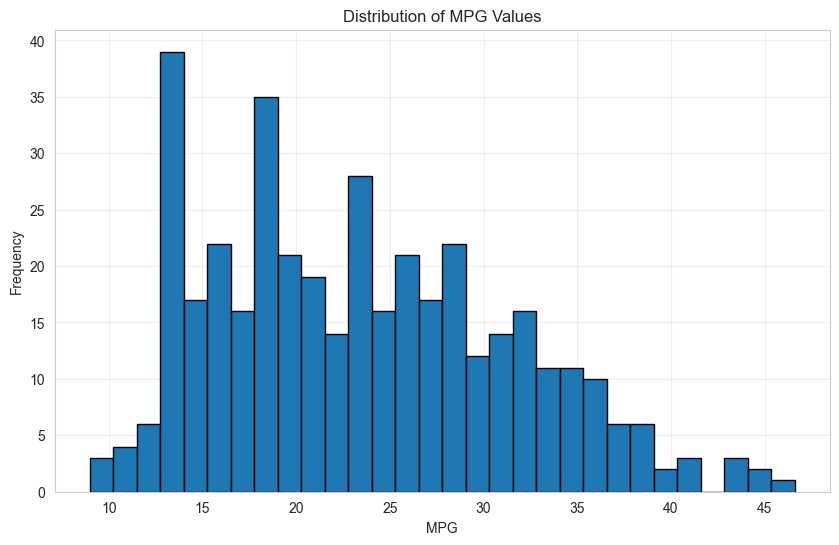

MPG Statistics:
count    397.000000
mean      23.528463
std        7.820926
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: MPG_numeric, dtype: float64


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Identify the MPG column (update this if your column is named differently)
mpg_col = 'mpg'  # change to match your DataFrame

if mpg_col in df_cars.columns:
    # Convert to numeric (coerce errors)
    df_cars['MPG_numeric'] = pd.to_numeric(df_cars[mpg_col], errors='coerce')
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    df_cars['MPG_numeric'].dropna().hist(bins=30, edgecolor='black')
    plt.xlabel('MPG')
    plt.ylabel('Frequency')
    plt.title('Distribution of MPG Values')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Display statistics
    print("MPG Statistics:")
    print(df_cars['MPG_numeric'].describe())
else:
    print(f"Column '{mpg_col}' not found. Available columns are:")
    print(df_cars.columns.tolist())


If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [28]:
# List of columns to convert to numeric (update names as per your CSV)
numeric_columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']

# Only keep columns that exist in df_cars
existing_numeric_cols = [col for col in numeric_columns if col in df_cars.columns]

# Convert them to numeric safely
for col in existing_numeric_cols:
    df_cars[col] = pd.to_numeric(df_cars[col], errors='coerce')

# Display dtypes of the converted columns
print("Data types after conversion:")
print(df_cars[existing_numeric_cols].dtypes)


Data types after conversion:
Series([], dtype: object)


Now let's see what is the mean of the MPG column

In [29]:
# Find the actual column name for MPG
mpg_col = None
for col in df_cars.columns:
    if col.lower() == 'mpg':  # ignore case
        mpg_col = col
        break

if mpg_col:
    # Calculate statistics
    mpg_mean = df_cars[mpg_col].mean()
    mpg_median = df_cars[mpg_col].median()
    mpg_missing = df_cars[mpg_col].isnull().sum()

    print(f"Mean MPG: {mpg_mean:.2f}")
    print(f"Median MPG: {mpg_median:.2f}")
    print(f"Missing MPG values: {mpg_missing}")
else:
    print("No column named 'MPG' found. Available columns are:")
    print(df_cars.columns.tolist())


Mean MPG: 23.53
Median MPG: 23.00
Missing MPG values: 0


We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [30]:
# Detect the actual MPG column (case-insensitive)
mpg_col = None
for col in df_cars.columns:
    if col.lower() == 'mpg':
        mpg_col = col
        break

if mpg_col:
    # Fill missing values with the mean
    df_cars[mpg_col + '_filled'] = df_cars[mpg_col].fillna(mpg_mean)
    
    print("MPG column after imputation with mean:")
    print(f"Missing values before: {df_cars[mpg_col].isnull().sum()}")
    print(f"Missing values after: {df_cars[mpg_col + '_filled'].isnull().sum()}")
    print(f"\nMean of filled column: {df_cars[mpg_col + '_filled'].mean():.2f}")
else:
    print("No column named 'MPG' found. Available columns are:")
    print(df_cars.columns.tolist())


MPG column after imputation with mean:
Missing values before: 0
Missing values after: 0

Mean of filled column: 23.53


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – 'mean'(default), 'median', 'most_frequent' and 'constant'.


Let's start by importing the `SimpleImputer` into our notebook

In [31]:
# SimpleImputer is already imported at the top
# from sklearn.impute import SimpleImputer

print("SimpleImputer imported successfully from sklearn.impute")

SimpleImputer imported successfully from sklearn.impute


What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

You can complete this section using the **Cars** (a.k.a. Auto) data sample in the course shell.

In [32]:
import pandas as pd
from sklearn.impute import SimpleImputer

# --- Step 1: Detect numeric columns automatically ---
numeric_cols = df_cars.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numeric columns detected for imputation:")
print(numeric_cols)

# --- Step 2: Check missing values before imputation ---
missing_before = df_cars[numeric_cols].isnull().sum()
print("\nColumns with missing values before imputation:")
print(missing_before[missing_before > 0])

# --- Step 3: Create and apply SimpleImputer ---
imputer = SimpleImputer(strategy='mean')
df_cars[numeric_cols] = imputer.fit_transform(df_cars[numeric_cols])

# --- Step 4: Check missing values after imputation ---
missing_after = df_cars[numeric_cols].isnull().sum()
print("\nColumns with missing values after imputation:")
print(missing_after[missing_after > 0])

# --- Step 5 (Optional): Summary of changes ---
filled_cols = missing_before[missing_before > 0].index.tolist()
if filled_cols:
    print(f"\nImputation applied to columns: {filled_cols}")
else:
    print("\nNo columns required imputation. All numeric columns were complete.")


Numeric columns detected for imputation:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model-year', 'MPG_numeric', 'mpg_filled']

Columns with missing values before imputation:
horsepower    2
dtype: int64

Columns with missing values after imputation:
Series([], dtype: int64)

Imputation applied to columns: ['horsepower']


In [33]:
# Automatically detect the columns
car_col = next((c for c in df_cars.columns if c.lower() == 'car'), None)
mpg_col = next((c for c in df_cars.columns if c.lower() == 'mpg'), None)
hp_col  = next((c for c in df_cars.columns if c.lower() == 'horsepower'), None)

columns_to_show = [col for col in [car_col, mpg_col, hp_col] if col is not None]

if columns_to_show:
    print("\nComparison of imputation methods:")
    print("\nOriginal data (with NaN):")
    print(df_cars[columns_to_show].head(10))
    
    if 'df_cars_imputed' in globals():  # check if imputed DataFrame exists
        print("\nImputed data (NaN replaced with mean):")
        print(df_cars_imputed[columns_to_show].head(10))
    else:
        print("\nImputed DataFrame not found. Please create df_cars_imputed first.")
else:
    print("None of the requested columns were found. Available columns are:")
    print(df_cars.columns.tolist())



Comparison of imputation methods:

Original data (with NaN):
    mpg  horsepower
0  15.0       165.0
1  18.0       150.0
2  16.0       150.0
3  17.0       140.0
4  15.0       198.0
5  14.0       220.0
6  14.0       215.0
7  14.0       225.0
8  15.0       190.0
9  15.0       170.0

Imputed DataFrame not found. Please create df_cars_imputed first.


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda's data frame.


https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Complete this section of the workshop using the Diabetes dataset that is included with the Scikit-Learn framework.



In [34]:
# Load the diabetes dataset from sklearn
diabetes = load_diabetes()

# Create a dataframe
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

print("Diabetes dataset loaded successfully")
print(f"Shape: {df_diabetes.shape}")
print("\nFirst few rows:")
df_diabetes.head()

Diabetes dataset loaded successfully
Shape: (442, 11)

First few rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [35]:
# Display dataset information
print("Dataset Info:")
print(df_diabetes.info())
print("\nStatistical Summary:")
print(df_diabetes.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Statistical Summary:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256

### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

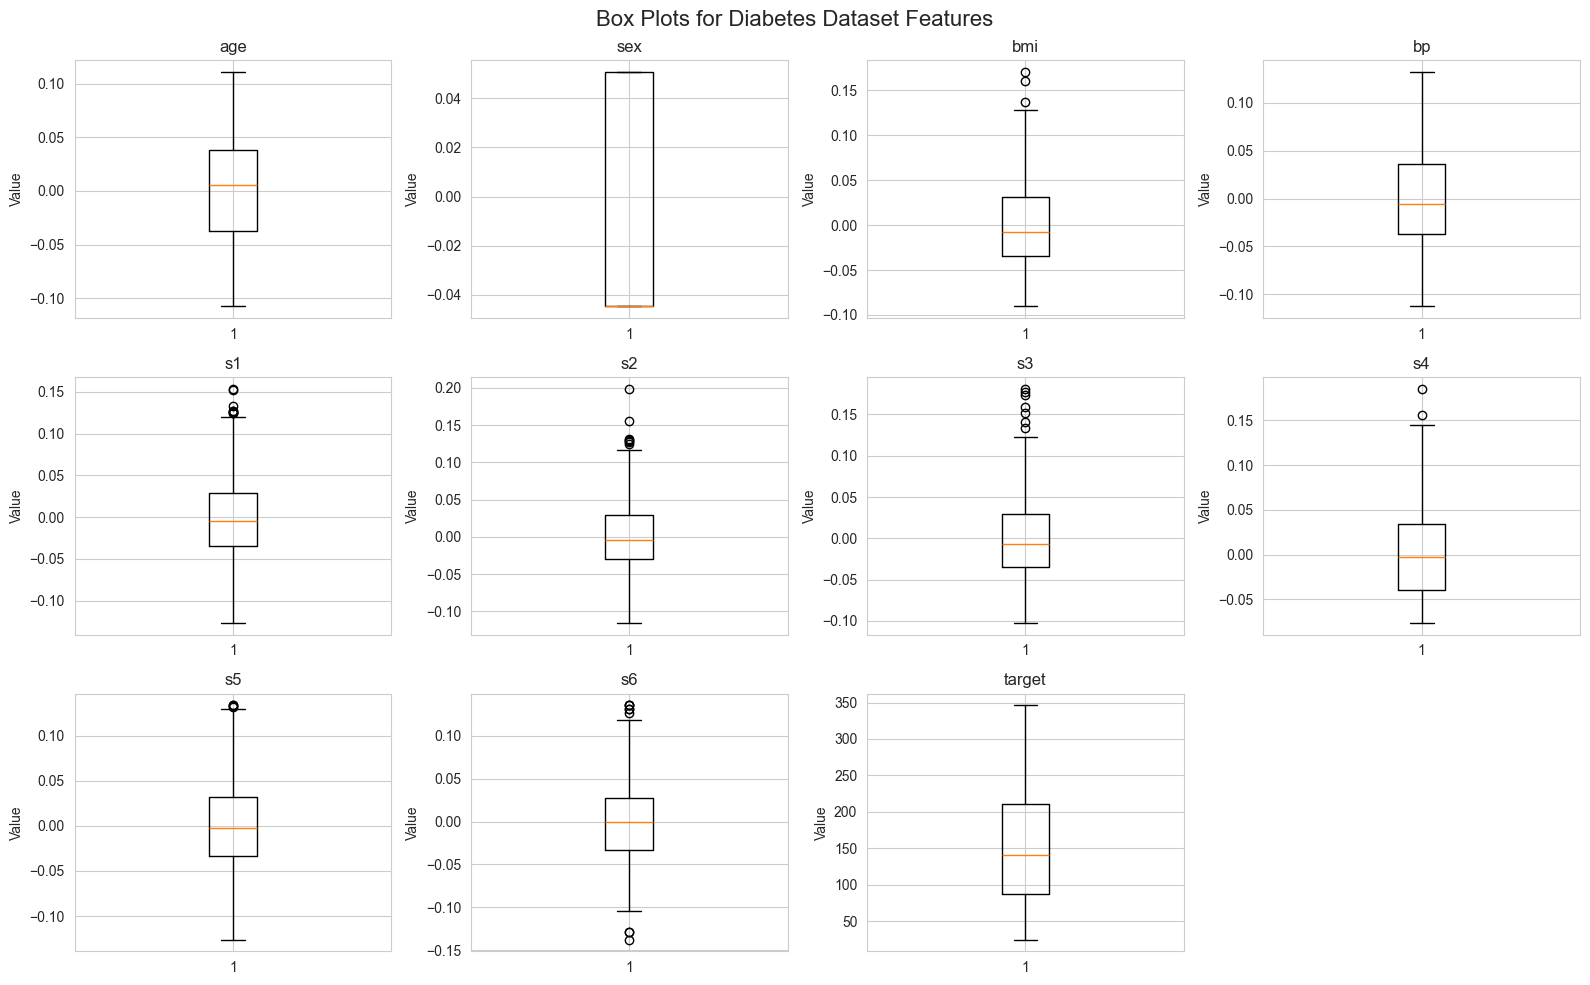

In [36]:
# Create box plots for all features
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
fig.suptitle('Box Plots for Diabetes Dataset Features', fontsize=16)

for idx, col in enumerate(df_diabetes.columns):
    row = idx // 4
    col_idx = idx % 4
    axes[row, col_idx].boxplot(df_diabetes[col].dropna())
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_ylabel('Value')

# Remove extra subplot
if len(df_diabetes.columns) < 12:
    for i in range(len(df_diabetes.columns), 12):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

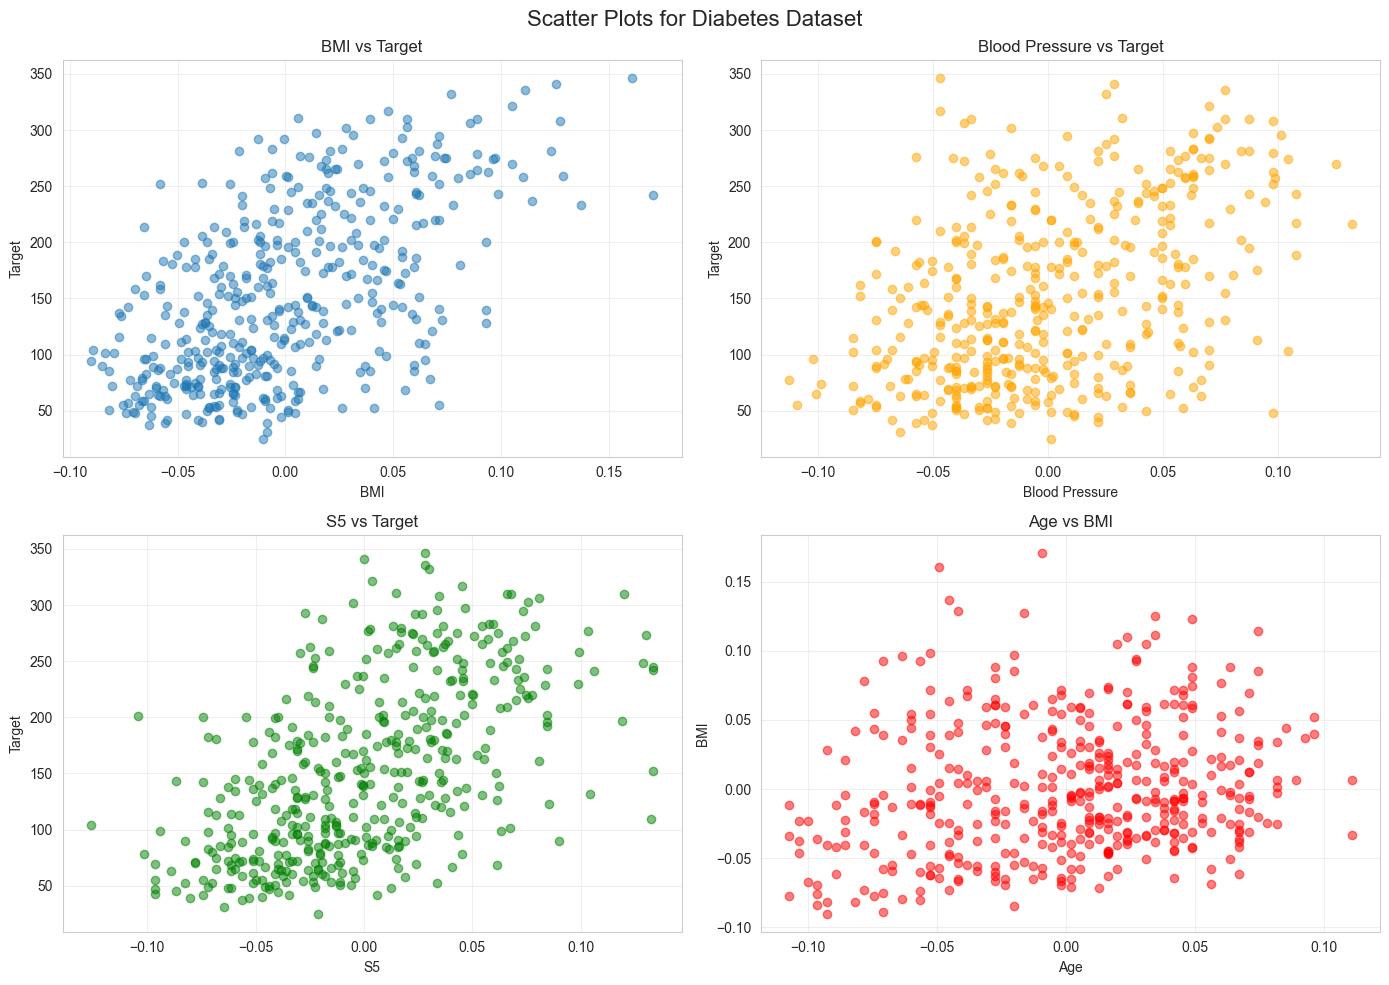

In [37]:
# Create scatter plots for selected feature pairs
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Scatter Plots for Diabetes Dataset', fontsize=16)

# Plot 1: BMI vs Target
axes[0, 0].scatter(df_diabetes['bmi'], df_diabetes['target'], alpha=0.5)
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Target')
axes[0, 0].set_title('BMI vs Target')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: BP vs Target
axes[0, 1].scatter(df_diabetes['bp'], df_diabetes['target'], alpha=0.5, color='orange')
axes[0, 1].set_xlabel('Blood Pressure')
axes[0, 1].set_ylabel('Target')
axes[0, 1].set_title('Blood Pressure vs Target')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: S5 vs Target
axes[1, 0].scatter(df_diabetes['s5'], df_diabetes['target'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('S5')
axes[1, 0].set_ylabel('Target')
axes[1, 0].set_title('S5 vs Target')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Age vs BMI
axes[1, 1].scatter(df_diabetes['age'], df_diabetes['bmi'], alpha=0.5, color='red')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('BMI')
axes[1, 1].set_title('Age vs BMI')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Smooth out noise and identify outliers

Use the following algorithms and techniques presented in class:

- Binning
- Regression Smoothing
- Outlier Detection
- Clustering
- Discretization

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [38]:
# Calculate Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df_diabetes))

# Create a dataframe with Z-scores
df_z_scores = pd.DataFrame(z_scores, columns=df_diabetes.columns)

print("Z-scores calculated for all features")
print("\nZ-scores for first 5 rows:")
print(df_z_scores.head())
print("\nZ-score statistics:")
print(df_z_scores.describe())

Z-scores calculated for all features

Z-scores for first 5 rows:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841  0.929746  0.732065  0.912451   
1  0.039567  0.938537  1.082180  0.553505  0.177624  0.402886  1.564414   
2  1.793307  1.065488  0.934533  0.119214  0.958674  0.718897  0.680245   
3  1.872441  0.938537  0.243771  0.770650  0.256292  0.525397  0.757647   
4  0.113172  0.938537  0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6    target  
0  0.054499  0.418531  0.370989  0.014719  
1  0.830301  1.436589  1.938479  1.001659  
2  0.054499  0.060156  0.545154  0.144580  
3  0.721302  0.476983  0.196823  0.699513  
4  0.054499  0.672502  0.980568  0.222496  

Z-score statistics:
              age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean     0.826126    0.997991    0.80

Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [39]:
# Identify outliers using Z-score threshold of 3
threshold = 3
outliers_z = (z_scores > threshold).any(axis=1)

print(f"Number of outliers detected (Z-score > {threshold}): {outliers_z.sum()}")
print(f"Percentage of outliers: {(outliers_z.sum() / len(df_diabetes)) * 100:.2f}%")

# Display outlier rows
print("\nOutlier rows:")
print(df_diabetes[outliers_z])

Number of outliers detected (Z-score > 3): 12
Percentage of outliers: 2.71%

Outlier rows:
          age       sex       bmi        bp        s1        s2        s3  \
58   0.041708 -0.044642 -0.064408  0.035644  0.012191 -0.057994  0.181179   
123  0.005383  0.050680  0.034751 -0.001091  0.152538  0.198788 -0.061809   
216  0.012648  0.050680  0.035829  0.049415  0.053469  0.074155 -0.069172   
230 -0.038207  0.050680  0.071397 -0.057313  0.153914  0.155887  0.000779   
256 -0.049105 -0.044642  0.160855 -0.046985 -0.029088 -0.019790 -0.047082   
260  0.041708 -0.044642 -0.008362 -0.057313  0.008063 -0.031376  0.151726   
261  0.048974 -0.044642 -0.041774  0.104501  0.035582 -0.025739  0.177497   
269  0.009016 -0.044642 -0.032073 -0.026328  0.042462 -0.010395  0.159089   
322  0.023546  0.050680  0.061696  0.062050  0.024574 -0.036073 -0.091262   
336 -0.020045 -0.044642  0.085408 -0.036656  0.091996  0.089499 -0.061809   
367 -0.009147  0.050680  0.170555  0.014987  0.030078  0.03375

In [40]:
# Identify outliers with Z-score > 2
threshold_2 = 2
outliers_z_2 = (z_scores > threshold_2).any(axis=1)

print(f"Number of outliers detected (Z-score > {threshold_2}): {outliers_z_2.sum()}")
print(f"Percentage of outliers: {(outliers_z_2.sum() / len(df_diabetes)) * 100:.2f}%")

# Show which features have outliers
print("\nFeatures with outliers (Z-score > 2):")
outlier_features = (z_scores > threshold_2).sum(axis=0)
print(outlier_features[outlier_features > 0])

Number of outliers detected (Z-score > 2): 132
Percentage of outliers: 29.86%

Features with outliers (Z-score > 2):
age       16
bmi       15
bp        19
s1        20
s2        20
s3        18
s4        19
s5        20
s6        21
target    11
dtype: int64


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [41]:
# Calculate IQR for each feature
Q1 = df_diabetes.quantile(0.25)
Q3 = df_diabetes.quantile(0.75)
IQR = Q3 - Q1

print("Inter-Quartile Range (IQR) for each feature:")
print(IQR)
print("\nQ1 (25th percentile):")
print(Q1)
print("\nQ3 (75th percentile):")
print(Q3)

Inter-Quartile Range (IQR) for each feature:
age         0.075375
sex         0.095322
bmi         0.065477
bp          0.072300
s1          0.062606
s2          0.060203
s3          0.064429
s4          0.073802
s5          0.065678
s6          0.061096
target    124.500000
dtype: float64

Q1 (25th percentile):
age       -0.037299
sex       -0.044642
bmi       -0.034229
bp        -0.036656
s1        -0.034248
s2        -0.030358
s3        -0.035117
s4        -0.039493
s5        -0.033246
s6        -0.033179
target    87.000000
Name: 0.25, dtype: float64

Q3 (75th percentile):
age         0.038076
sex         0.050680
bmi         0.031248
bp          0.035644
s1          0.028358
s2          0.029844
s3          0.029312
s4          0.034309
s5          0.032432
s6          0.027917
target    211.500000
Name: 0.75, dtype: float64


To define the outlier base value is defined above and below dataset's normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [42]:
# Calculate upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bounds for each feature:")
print(lower_bound)
print("\nUpper bounds for each feature:")
print(upper_bound)

Lower bounds for each feature:
age       -0.150362
sex       -0.187624
bmi       -0.132445
bp        -0.145106
s1        -0.128157
s2        -0.120663
s3        -0.131760
s4        -0.150197
s5        -0.131762
s6        -0.124823
target   -99.750000
dtype: float64

Upper bounds for each feature:
age         0.151139
sex         0.193663
bmi         0.129464
bp          0.144094
s1          0.122267
s2          0.120149
s3          0.125954
s4          0.145012
s5          0.130949
s6          0.119561
target    398.250000
dtype: float64


In [43]:
# Identify outliers using IQR method
outliers_iqr = ((df_diabetes < lower_bound) | (df_diabetes > upper_bound)).any(axis=1)

print(f"Number of outliers detected using IQR method: {outliers_iqr.sum()}")
print(f"Percentage of outliers: {(outliers_iqr.sum() / len(df_diabetes)) * 100:.2f}%")

# Count outliers per feature
print("\nOutliers per feature:")
outliers_per_feature = ((df_diabetes < lower_bound) | (df_diabetes > upper_bound)).sum()
print(outliers_per_feature[outliers_per_feature > 0])

Number of outliers detected using IQR method: 31
Percentage of outliers: 7.01%

Outliers per feature:
bmi    3
s1     8
s2     7
s3     7
s4     2
s5     4
s6     9
dtype: int64


- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [44]:
# Remove outliers using IQR method
df_diabetes_no_outliers = df_diabetes[~outliers_iqr]

print(f"Original dataset shape: {df_diabetes.shape}")
print(f"Dataset shape after removing outliers: {df_diabetes_no_outliers.shape}")
print(f"Number of rows removed: {df_diabetes.shape[0] - df_diabetes_no_outliers.shape[0]}")
print(f"Percentage of data retained: {(len(df_diabetes_no_outliers) / len(df_diabetes)) * 100:.2f}%")

Original dataset shape: (442, 11)
Dataset shape after removing outliers: (411, 11)
Number of rows removed: 31
Percentage of data retained: 92.99%


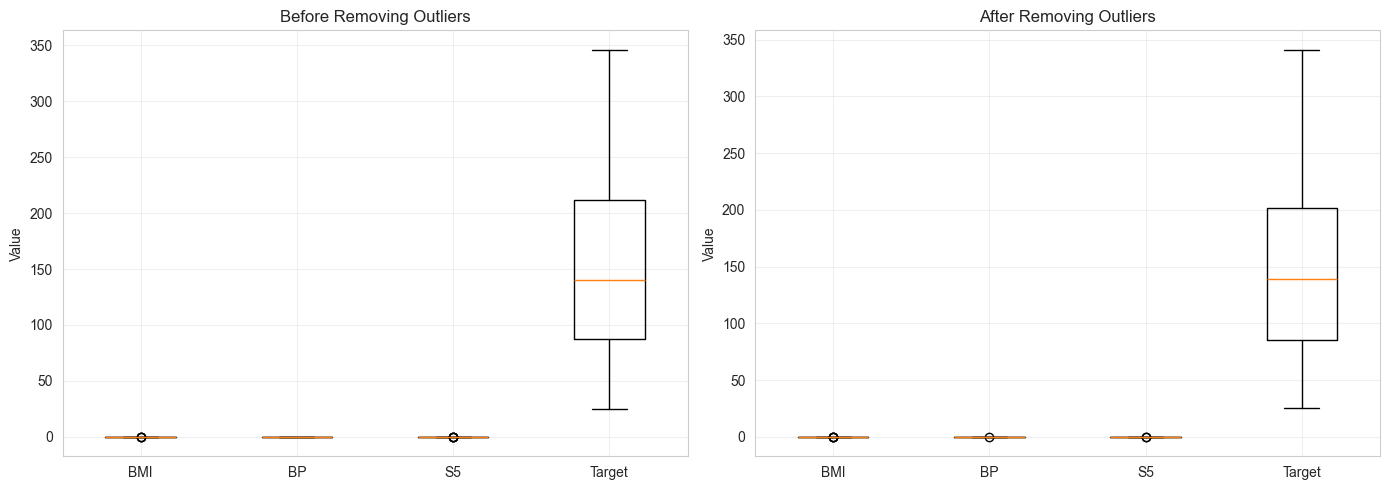


Comparison of statistics:

Before removing outliers:
                bmi            bp            s5      target
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000
mean  -2.245564e-16 -4.797570e-17  9.293722e-17  152.133484
std    4.761905e-02  4.761905e-02  4.761905e-02   77.093005
min   -9.027530e-02 -1.123988e-01 -1.260971e-01   25.000000
25%   -3.422907e-02 -3.665608e-02 -3.324559e-02   87.000000
50%   -7.283766e-03 -5.670422e-03 -1.947171e-03  140.500000
75%    3.124802e-02  3.564379e-02  3.243232e-02  211.500000
max    1.705552e-01  1.320436e-01  1.335973e-01  346.000000

After removing outliers:
              bmi          bp          s5      target
count  411.000000  411.000000  411.000000  411.000000
mean    -0.001478   -0.000254   -0.002924  149.970803
std      0.045594    0.046634    0.045482   75.772954
min     -0.090275   -0.112399   -0.126097   25.000000
25%     -0.034229   -0.033213   -0.034522   85.500000
50%     -0.007284   -0.005670   -0.005142  139.000000
75

In [45]:
# Visualize the effect of outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before removing outliers
axes[0].boxplot([df_diabetes[col] for col in ['bmi', 'bp', 's5', 'target']])
axes[0].set_xticklabels(['BMI', 'BP', 'S5', 'Target'])
axes[0].set_title('Before Removing Outliers')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

# After removing outliers
axes[1].boxplot([df_diabetes_no_outliers[col] for col in ['bmi', 'bp', 's5', 'target']])
axes[1].set_xticklabels(['BMI', 'BP', 'S5', 'Target'])
axes[1].set_title('After Removing Outliers')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nComparison of statistics:")
print("\nBefore removing outliers:")
print(df_diabetes[['bmi', 'bp', 's5', 'target']].describe())
print("\nAfter removing outliers:")
print(df_diabetes_no_outliers[['bmi', 'bp', 's5', 'target']].describe())

## Summary

In this notebook, we completed the following data cleaning and tidying tasks:

### Data Tidying:
1. **PEW Dataset**: Transformed wide format data to long format using `melt()`, converting income range columns into rows
2. **Billboard Dataset**: Restructured week-based columns into a tidy format, cleaned week numbers, calculated dates, and removed null values

### Data Cleaning:
1. **Missing Data Handling**:
   - Analyzed missing value percentages
   - Compared dropping rows vs columns
   - Implemented imputation using mean values
   - Used `SimpleImputer` from sklearn for automated imputation

2. **Outlier Detection**:
   - Visualized outliers using box plots and scatter plots
   - Detected outliers using Z-score method (threshold: 3)
   - Detected outliers using IQR method (1.5 × IQR)
   - Removed outliers and compared dataset statistics

### Key Takeaways:
- Tidy data makes analysis and visualization significantly easier
- Choice of imputation method depends on data distribution
- Multiple methods for outlier detection provide different perspectives
- Visual inspection complements statistical methods for outlier detection

# Replicability Check

To ensure reproducibility, the notebook was tested in a clean virtual environment.

All required libraries were installed using `requirements.txt`.

CSV files are included in the repository inside the `CSVs/` folder to prevent missing file errors.

All file paths use relative paths (no absolute system paths).

The notebook was executed from top-to-bottom using "Run All" to verify that:
- No missing packages exist
- No file path errors occur
- No execution order issues occur

Final Result:
The notebook executes successfully without errors on a clean setup.
